In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data.csv")
print(df.head)



<bound method NDFrame.head of                       name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  


In [5]:
def remove_sign(val):
    val = str(val).split('/')
    val = val[0]
    return float(val)

df['rate']=df['rate'].apply(remove_sign)
print(df.head)

<bound method NDFrame.head of                       name online_order book_table  rate  votes  \
0                    Jalsa          Yes        Yes   4.1    775   
1           Spice Elephant          Yes         No   4.1    787   
2          San Churro Cafe          Yes         No   3.8    918   
3    Addhuri Udupi Bhojana           No         No   3.7     88   
4            Grand Village           No         No   3.8    166   
..                     ...          ...        ...   ...    ...   
143       Melting Melodies           No         No   3.3      0   
144        New Indraprasta           No         No   3.3      0   
145           Anna Kuteera          Yes         No   4.0    771   
146                 Darbar           No         No   3.0     98   
147          Vijayalakshmi          Yes         No   3.9     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2           

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Text(0.5, 0, 'Type of Restaurant')

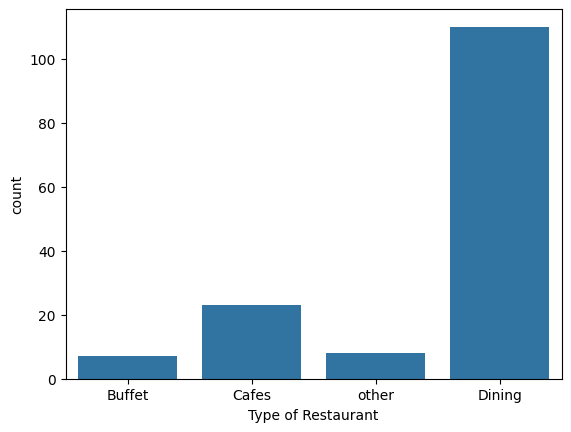

In [8]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Type of Restaurant")

Text(0, 0.5, 'Votes')

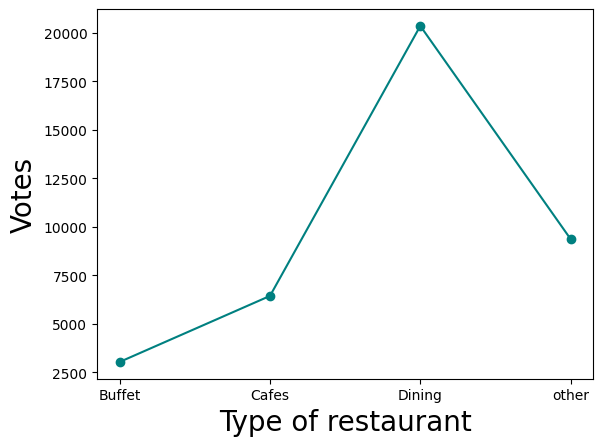

In [12]:
grouped = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped})
plt.plot(result, c="teal", marker="o")
plt.xlabel("Type of restaurant", c="black", size=20)
plt.ylabel("Votes", c="black", size=20)

In [14]:
max_votes = df['votes'].max()
restaurant_max_votes = df.loc[df['votes'] == max_votes, 'name']
 
print("Restaurants with the maximum votes:")
print(restaurant_max_votes)

Restaurants with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


C:\Users\Asus\AppData\Local\Temp\ipykernel_40408\2774511076.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['online_order'],palette={'Yes': 'teal', 'No': 'purple'})


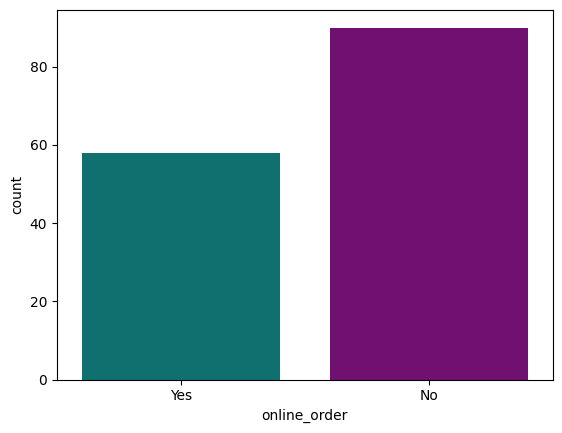

In [18]:
sns.countplot(x=df['online_order'],palette={'Yes': 'teal', 'No': 'purple'})
plt.show()

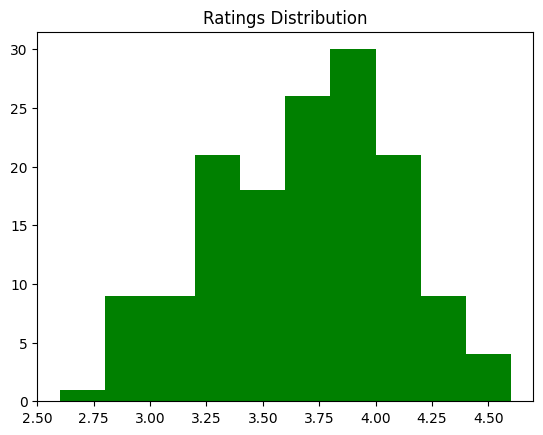

In [19]:
plt.hist(df['rate'],color='green')
plt.title("Ratings Distribution")
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_40408\3234742709.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=couple_data, palette='husl')


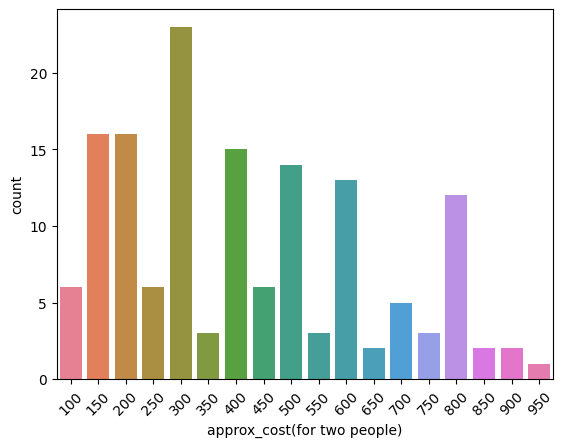

In [23]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data, palette='husl')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='online_order', ylabel='rate'>

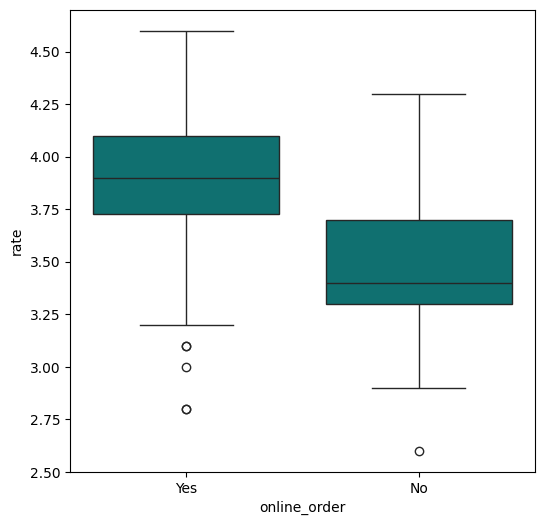

In [26]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = df,color='teal')

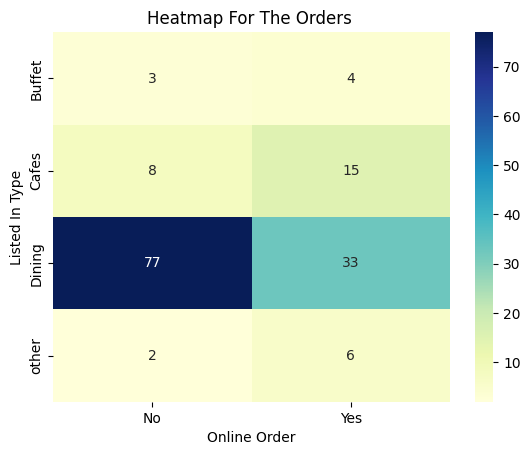

In [29]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap For The Orders ")
plt.xlabel("Online Order")
plt.ylabel("Listed In Type")
plt.show()